#DESKRIPSI LIBRARY YANG DIGUNAKAN

In [ ]:
pip install seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#MEMANGGIL DATA SET

In [6]:
df = pd.read_csv('Documents/data/toyota.csv')

#DESKRIPSI DATASET

In [7]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


<Axes: >

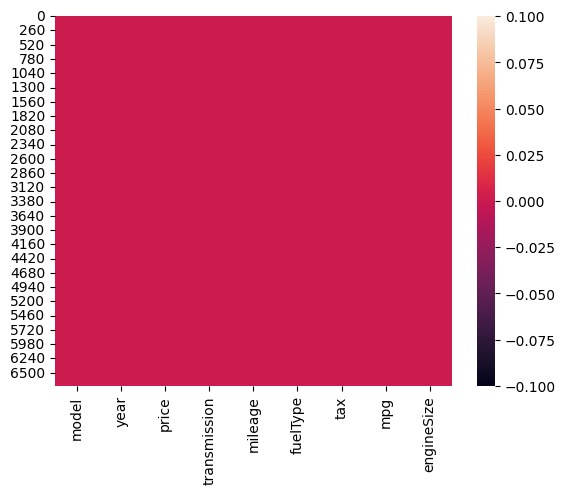

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


VISUALISASI DATA

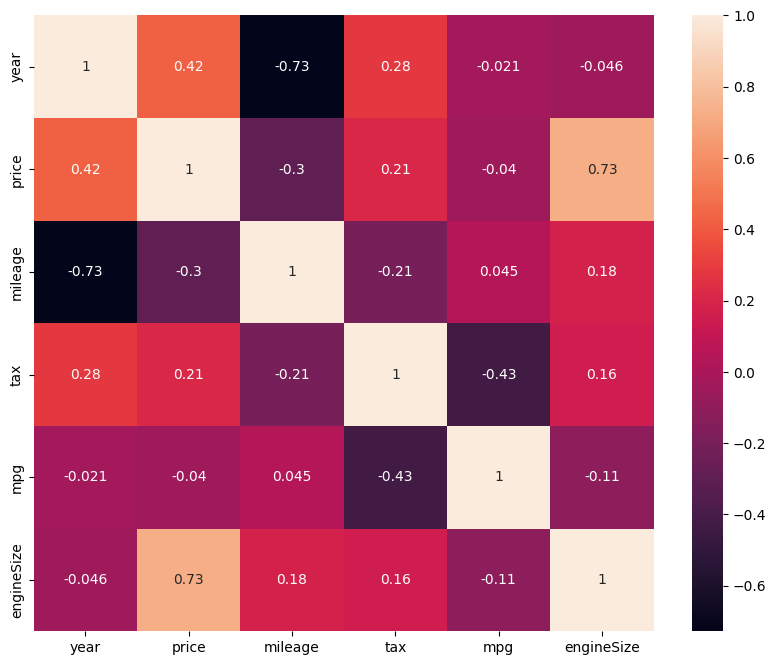

In [12]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

JUMLAH MOBIL BERDASARKAN MODEL

In [13]:
models = df.groupby('model').count()[['tax']].sort_values(by='tax',ascending=True).reset_index()
models = models.rename(columns={'tax':'numberOfCars'})

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ' Verso-S'),
  Text(1, 0, ' Urban Cruiser'),
  Text(2, 0, ' IQ'),
  Text(3, 0, ' Camry'),
  Text(4, 0, ' Supra'),
  Text(5, 0, ' PROACE VERSO'),
  Text(6, 0, ' Land Cruiser'),
  Text(7, 0, ' GT86'),
  Text(8, 0, ' Hilux'),
  Text(9, 0, ' Verso'),
  Text(10, 0, ' Avensis'),
  Text(11, 0, ' Prius'),
  Text(12, 0, ' Corolla'),
  Text(13, 0, ' RAV4'),
  Text(14, 0, ' C-HR'),
  Text(15, 0, ' Auris'),
  Text(16, 0, ' Aygo'),
  Text(17, 0, ' Yaris')])

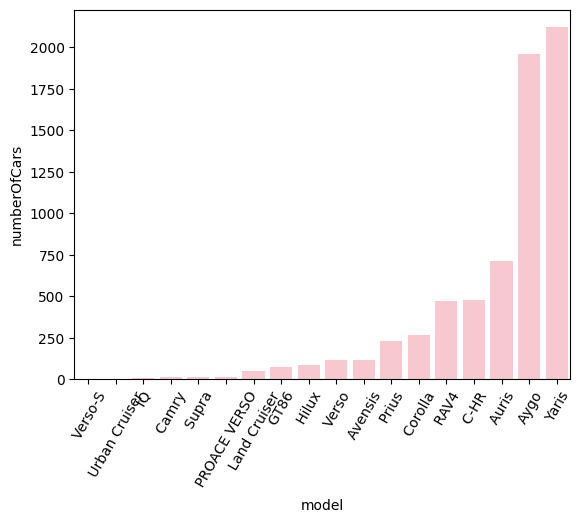

In [14]:

sns.barplot(x=models['model'], y=models['numberOfCars'], color='pink')
plt.xticks(rotation=60)

UKURAN MESIN

In [15]:
engine = df.groupby('engineSize').count()[['tax']].sort_values(by='tax').reset_index()
engine = engine.rename(columns={'tax':'count'})

<Axes: xlabel='engineSize', ylabel='count'>

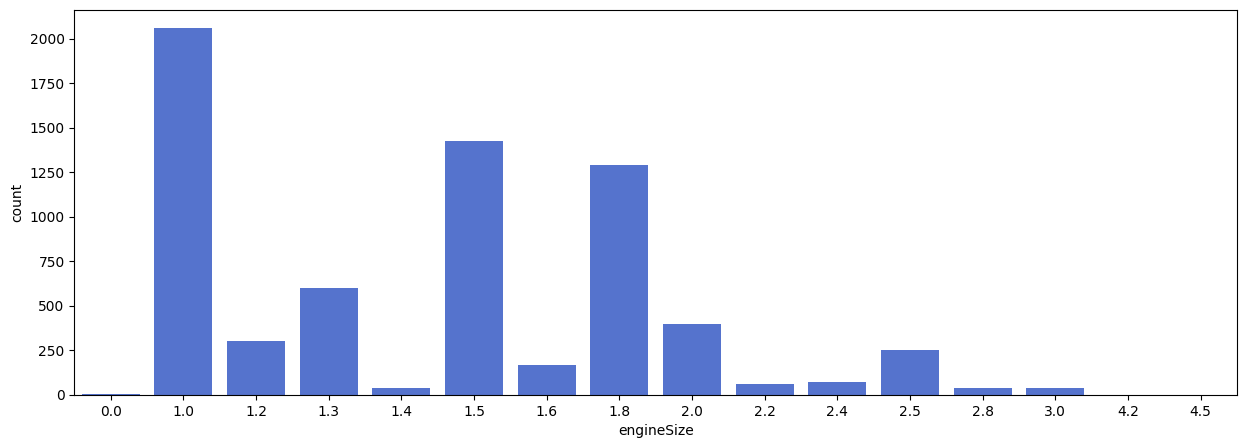

In [16]:
plt.figure(figsize=(15,5))
sns.barplot(x=engine['engineSize'], y=engine['count'], color='royalblue')

DISTRIBUSI MILEAGE

<Figure size 1500x500 with 0 Axes>

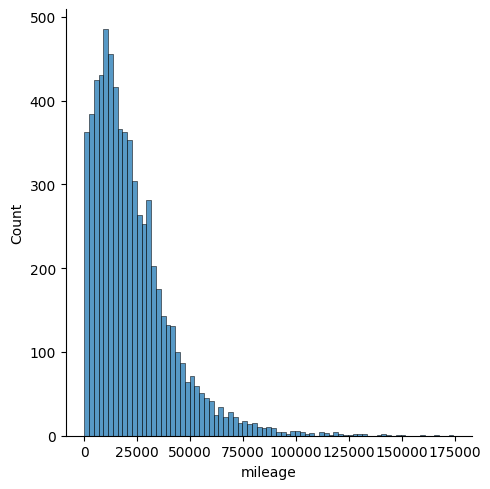

In [17]:
plt.figure(figsize=(15,5))
sns.displot(df['mileage'])

DISTRIBUSI HARGA MOBIL

<Figure size 1500x500 with 0 Axes>

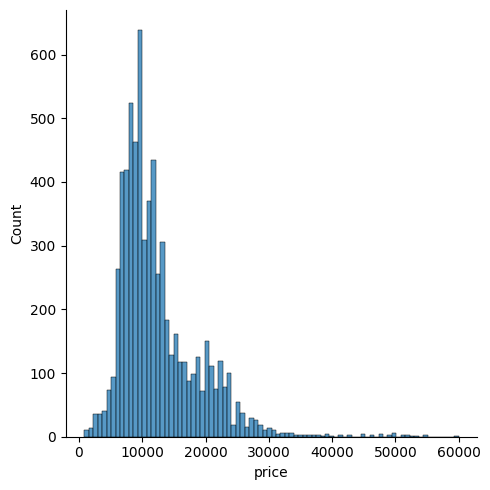

In [18]:
plt.figure(figsize=(15,5))
sns.displot(df['price'])

SELEKSI FITUR

In [19]:
features = ['year','mileage','tax','mpg','engineSize']
x = df[features]
y = df['price']
x.shape, y.shape

((6738, 5), (6738,))

split data training dan data testing

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(1685,)

MEMBUAT MODEL REGRESIMLINIER

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

In [22]:
score = lr.score(x_test,y_test)
print('akurasi model regresi linier = ',score)

akurasi model regresi linier =  0.7678983314475204


MEMBUAT INPUTAN MODEL REGRESI LINIER

In [23]:
#year=2019, mileage=5000, tax=145, mpg=30.2, engineSize=2
input_data = np.array([[2019,5000,145,30.2,2]])

prediction = lr.predict(input_data)
print('Estimasi harga mobil dalam EUR :', prediction)

Estimasi harga mobil dalam EUR : [21208.50538579]


c:\Users\NAZA SULTHONIYAH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


SAVE MODEL

In [24]:
import pickle

filename = 'estimasi_mobil.sav'
pickle.dump(lr,open(filename,'wb'))

In [10]:
import pandas as pd

# Membaca data
df = pd.read_csv('Documents/data/toyota.csv')

# Fungsi Divide and Conquer untuk subset data berdasarkan threshold yang lebih fleksibel
def divide_data_flexible(df, thresholds, min_rows=10):
    subset = df
    for feature, threshold in thresholds.items():
        # Terapkan threshold hanya jika subset lebih besar dari minimal baris yang diizinkan
        filtered_subset = subset[subset[feature] <= threshold]
        if len(filtered_subset) >= min_rows:
            subset = filtered_subset
        if len(subset) < min_rows:
            return subset  # Mengembalikan subset yang cukup tanpa membagi lebih lanjut
    return subset

# Siapkan fungsi matriks regresi
def prepare_matrices(subset):
    X = []
    Y = []
    
    # Mendapatkan nilai unik untuk model, transmisi, dan fuelType
    model_types = list(df['model'].unique())
    transmission_types = list(df['transmission'].unique())
    fuel_types = list(df['fuelType'].unique())

    for _, row in subset.iterrows():
        # One-hot encoding untuk fitur kategori
        model_features = [1 if row['model'] == model else 0 for model in model_types]
        transmission_features = [1 if row['transmission'] == trans else 0 for trans in transmission_types]
        fuel_features = [1 if row['fuelType'] == fuel else 0 for fuel in fuel_types]
        
        # Fitur dasar yang distandarisasi
        features = [
            1,
            (row['mileage'] - df['mileage'].mean()) / df['mileage'].std(),
            (row['year'] - df['year'].mean()) / df['year'].std(),
            (row['engineSize'] - df['engineSize'].mean()) / df['engineSize'].std(),
            (row['mpg'] - df['mpg'].mean()) / df['mpg'].std(),
            (row['tax'] - df['tax'].mean()) / df['tax'].std()
        ]
        
        features.extend(model_features + transmission_features + fuel_features)
        X.append(features)
        Y.append(row['price'])
    
    return X, Y

# Fungsi menghitung weights dengan metode invers matriks dengan regularisasi
def calculate_weights(X, Y, regularization_strength=0.1):
    X_T = transpose(X)
    X_T_X = matrix_multiplication(X_T, X)
    X_T_Y = matrix_multiplication(X_T, [[y] for y in Y])

    # Regularisasi pada diagonal
    for i in range(len(X_T_X)):
        X_T_X[i][i] += regularization_strength

    X_T_X_inv = matrix_inverse(X_T_X)
    W = matrix_multiplication(X_T_X_inv, X_T_Y)
    return [w[0] for w in W]

# Fungsi tambahan matriks
def transpose(matrix):
    return list(map(list, zip(*matrix)))

def matrix_multiplication(A, B):
    return [[sum(a * b for a, b in zip(A_row, B_col)) for B_col in zip(*B)] for A_row in A]

def matrix_inverse(matrix):
    n = len(matrix)
    identity = [[float(i == j) for i in range(n)] for j in range(n)]
    augmented_matrix = [row[:] + identity_row[:] for row, identity_row in zip(matrix, identity)]

    for i in range(n):
        if augmented_matrix[i][i] == 0:
            for j in range(i + 1, n):
                if augmented_matrix[j][i] != 0:
                    augmented_matrix[i], augmented_matrix[j] = augmented_matrix[j], augmented_matrix[i]
                    break
            else:
                raise ValueError("Matrix is singular")
        
        factor = augmented_matrix[i][i]
        augmented_matrix[i] = [element / factor for element in augmented_matrix[i]]
        
        for j in range(n):
            if j != i:
                factor = augmented_matrix[j][i]
                augmented_matrix[j] = [
                    elem_j - factor * elem_i
                    for elem_j, elem_i in zip(augmented_matrix[j], augmented_matrix[i])
                ]
    
    return [row[n:] for row in augmented_matrix]

def predict_price(features, weights):
    return sum(f * w for f, w in zip(features, weights))

def calculate_mse(Y_actual, Y_pred):
    n = len(Y_actual)
    squared_errors = [(y_a - y_p) ** 2 for y_a, y_p in zip(Y_actual, Y_pred)]
    mse = sum(squared_errors) / n
    return mse

# Input threshold untuk Divide and Conquer
thresholds = {
    'year': 2015,
    'engineSize': 2.0,
    'mileage': 50000,       
    'mpg': 40,
    'tax': 150
}

# Menyiapkan subset data dengan minimum baris yang ditentukan
subset = divide_data_flexible(df, thresholds, min_rows=10)

if subset is not None and len(subset) >= 2:
    # Menghitung matriks X dan Y
    X, Y = prepare_matrices(subset)
    
    # Menghitung weights model
    weights = calculate_weights(X, Y)
    
    # Memprediksi harga dan menghitung MSE
    Y_pred = [predict_price(features, weights) for features in X]
    mse = calculate_mse(Y, Y_pred)
    
    print(f"Mean Squared Error: {mse:.2f}")

    # Contoh prediksi harga
    test_features = [1, 50000, 2015, 2.0, 40, 150] # Standarisasi input manual atau gunakan rata-rata data
    estimated_price = predict_price(test_features, weights)
    print(f"Estimated Price: Rp. {estimated_price:,.0f}")
else:
    print("Data subset is insufficient to make predictions.")


Mean Squared Error: 209399.35
Estimated Price: Rp. -50,937,421
